# Plant Seedlings Classification
## Determine the species of a seedling from an image

## importing stuff

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0,"/home/ubuntu/fastai/")
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

path = '/home/ubuntu/data/plantseed/'

### look at seedlings

In [2]:
Maize = !ls /home/ubuntu/data/plantseed/train/Maize/ | head
Maize

['006196e1c.png',
 '0086c28b2.png',
 '0150b5b7e.png',
 '01642cae8.png',
 '0184ec53f.png',
 '030e7f9ef.png',
 '0419f5bbc.png',
 '051ea51d0.png',
 '06e1ee6e1.png',
 '084d21b80.png']

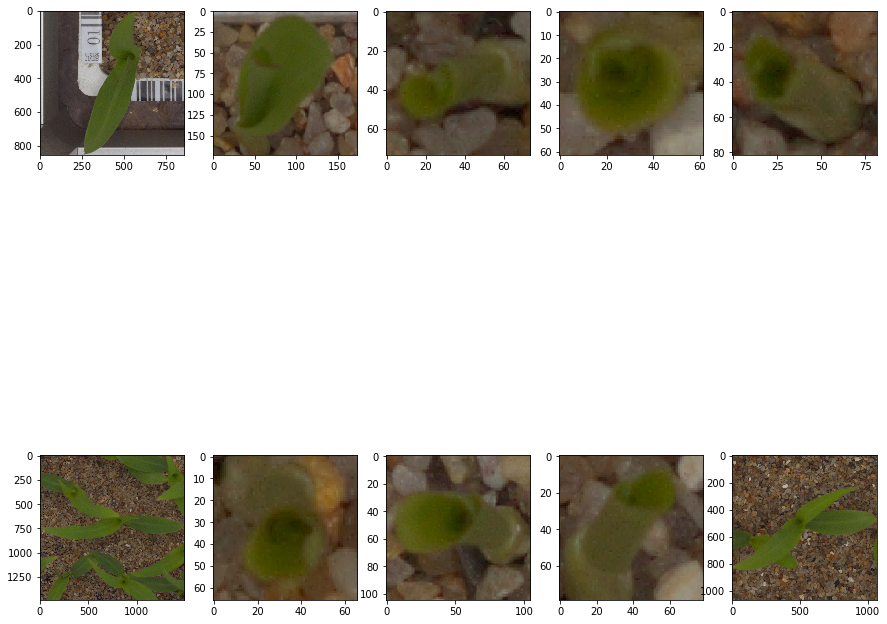

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

for i,images in enumerate(Maize):
    sub = 521 + int(i)
    img = plt.imread(path+'train/Maize/'+images)
    plt.subplot(2,5,i+1)
    plt.imshow(img, aspect='equal')

In [4]:
img.shape

(1066, 1066, 3)

In [29]:
sz = 224
#arch=resnext101_64
arch = resnet50
tfms = tfms_from_model(arch,sz,aug_tfms = transforms_side_on,max_zoom=1.05)
#data = ImageClassifierData.from_csv(PATH, 'train',csv_fname = PATH + 'labels.csv',bs=64,test_name = 'test',val_idxs=val_idx,suffix='.jpg',tfms=tfms)
data = ImageClassifierData.from_paths(path, tfms=tfms,val_name='valid',test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=True)


### Choosing a learning rate

A Jupyter Widget

 76%|███████▌  | 54/71 [00:01<00:00, 34.44it/s, loss=13.2]


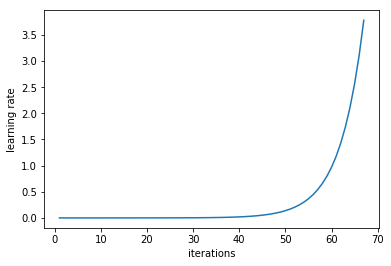

In [30]:
lrf=learn.lr_find()
learn.sched.plot_lr()

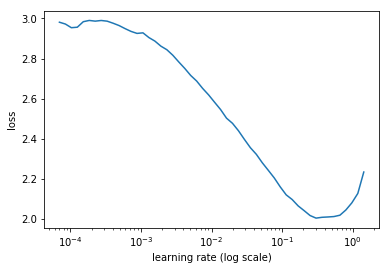

In [31]:
learn.sched.plot()

In [32]:
learn.fit(0.01, 10)

A Jupyter Widget

epoch:   0, train_loss: 1.075130, val_loss: 0.624378, accuracy: 0.799479
epoch:   1, train_loss: 0.700282, val_loss: 0.518706, accuracy: 0.824219
epoch:   2, train_loss: 0.516737, val_loss: 0.427252, accuracy: 0.858073
epoch:   3, train_loss: 0.411956, val_loss: 0.385855, accuracy: 0.861979
epoch:   4, train_loss: 0.350285, val_loss: 0.408013, accuracy: 0.856771
epoch:   5, train_loss: 0.305609, val_loss: 0.362172, accuracy: 0.880208
epoch:   6, train_loss: 0.277028, val_loss: 0.351686, accuracy: 0.855469
epoch:   7, train_loss: 0.246492, val_loss: 0.349314, accuracy: 0.880208
epoch:   8, train_loss: 0.229303, val_loss: 0.343212, accuracy: 0.864583
epoch:   9, train_loss: 0.204505, val_loss: 0.330568, accuracy: 0.878906



In [ ]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy(probs,y)

0.875

In [ ]:
learn.unfreeze()

lr_ar = [1e-4,1e-3,1e-2]
learn.fit(lr_ar,3,cycle_len=1,cycle_mult=2)

A Jupyter Widget

epoch:   0, train_loss: 0.380269, val_loss: 0.317009, accuracy: 0.888021
epoch:   1, train_loss: 0.365015, val_loss: 0.313035, accuracy: 0.884115
epoch:   2, train_loss: 0.309133, val_loss: 0.304894, accuracy: 0.895833
 14%|█▍        | 10/71 [00:08<00:52,  1.15it/s, loss=0.313]

In [ ]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy(probs,y)

In [ ]:
learn.fit(1e-5,10)

In [ ]:
lrf=learn.lr_find()
learn.sched.plot_lr()

In [ ]:
learn.sched.plot()

In [ ]:
def get_data(sz,bs):
    tfms = tfms_from_model(arch,sz,aug_tfms = transforms_side_on,max_zoom=1.0)
    data = ImageClassifierData.from_paths(path, tfms=tfms,val_name='valid',test_name='test',bs=bs)
    return data if sz>300 else data.resize(340,'tmp')

In [ ]:
#learn.set_data(get_data(500,28))
#learn.freeze()

In [ ]:
learn.fit(1e-4,3,cycle_len=1)

In [ ]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy(probs,y)

In [ ]:
lr_ar = [1e-4,1e-3,1e-2]
learn.fit(lr_ar,3,cycle_len=1,cycle_mult=2)

In [ ]:
lr=0.01
lrs=np.array([lr/18,lr/6,lr/2])
learn.fit(lr_ar,3,cycle_len=1,cycle_mult=2)

In [ ]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy(probs,y)

In [ ]:
probs = learn.predict(is_test=True)
classes = learn.data.classes

In [ ]:
pr = np.exp(probs)
preds = np.argmax(pr,axis=1)
preds

In [ ]:
pred_names = [classes[num] for num in preds]
pred_names

In [ ]:
fname = data.test_dl.dataset.fnames[:]
fnames = [name[5:] for name in fname]
fnames

In [ ]:
len(fnames),len(pred_names)

In [ ]:
sub=np.stack([fnames,pred_names],axis=1)
sub

In [ ]:
np.savetxt('/home/ubuntu/kagglecompetitions/plantseed/submit.csv',sub,fmt='%s,%s',header='file,species',comments='')

In [ ]:
from IPython.display import FileLink
FileLink('/home/ubuntu/kagglecompetitions/plantseed/submit.csv')

In [ ]:
%%bash

kg submit ~/kagglecompetitions/plantseed/submit.csv -p <pass> -c plant-seedlings-classification -m "Try no 3"

## Analyze Results

In [ ]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [ ]:
plot_confusion_matrix(cm, data.classes)